In [1]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '냉장고']

encoder = LabelEncoder()
encoder.fit(items)      # 매핑표를 만들어준다
labels = encoder.transform(items)

print(labels)

[0 1 3 4 2 2 1]


In [6]:
import pandas as pd

df = pd.read_csv('../data/iris.csv')

encoder = LabelEncoder()
encoder.fit(df['variety'])
df['variety'] = encoder.transform(df['variety'])

print(encoder.classes_)
df['variety'].value_counts()

['Setosa' 'Versicolor' 'Virginica']


variety
0    50
1    50
2    50
Name: count, dtype: int64

In [12]:
# 원-핫 인코딩
data = {'items': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '냉장고']}

df = pd.DataFrame(data)
pd.get_dummies(df).head()

,items_TV,items_냉장고,items_선풍기,items_전자레인지,items_컴퓨터
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,True,False,False


In [37]:
df = pd.read_csv('../data/iris.csv')

df = pd.get_dummies(df, columns = ['variety'])

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False


In [38]:
# 표준화
from sklearn.preprocessing import StandardScaler

df = df.drop(['variety_Setosa', 'variety_Versicolor', 'variety_Virginica'], axis = 1, errors = 'ignore')
col = df.columns

print('Mean')
print(df.mean())
print('\nVar')
print(df.var())

scaler = StandardScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), columns = col)

df.head()

Mean
sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64

Var
sepal.length    0.685694
sepal.width     0.189979
petal.length    3.116278
petal.width     0.581006
dtype: float64


,sepal.length,sepal.width,petal.length,petal.width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [42]:
# 정규화
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/iris.csv')

df = df.drop('variety', axis = 1, errors = 'ignore')
col = df.columns

scaler = MinMaxScaler()
scaler.fit(df)

df = pd.DataFrame(scaler.transform(df), columns = col)

df

,sepal.length,sepal.width,petal.length,petal.width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


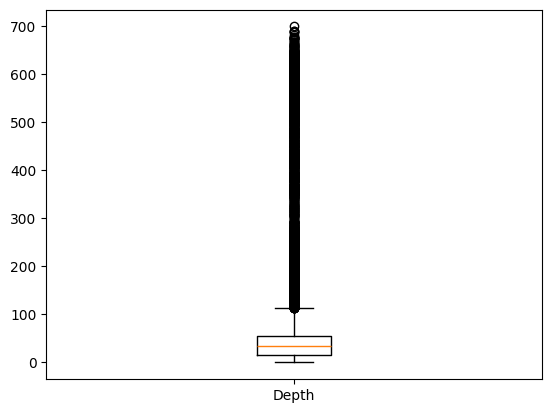

In [53]:
# 이상치 감지
import matplotlib.pyplot as plt

df = pd.read_csv('../data/earthquakes.csv')

plt.boxplot(df['Depth'])
plt.xticks([1], ['Depth'])
plt.show()

In [65]:
q1 = df['Depth'].quantile(0.25) # 1사분위수
q3 = df['Depth'].quantile(0.75) # 3사분위수
iqr = q3 - q1

# 이상치 경계값 계산
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

# 필터 조건
cond1 = df['Depth'] >= lower
cond2 = df['Depth'] <= upper

print('Mean: {}'.format(df[cond1 & cond2]['Depth'].mean()))
df[cond1 & cond2].head()

Mean: 31.25170960373423


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,01/10/1965,13:36:32,-13.405,166.629,Earthquake,35.0,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
